In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from torchvision import datasets, transforms

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# path to store data and/or load from
!mkdir -p datasets
data_path="./datasets"

In [4]:
train_data = datasets.MNIST(root=data_path, train=True, 
                            transform=transforms.ToTensor(), download=True)
x_train, y_train = train_data.data,train_data.targets
print(f'train data shape: {x_train.shape, y_train.shape}')

val_data = datasets.MNIST(root=data_path, train=False, 
                          transform=transforms.ToTensor(), download=True)
x_val,y_val = val_data.data, val_data.targets
print(f'val data shape: {x_val.shape, y_val.shape}')


train data shape: (torch.Size([60000, 28, 28]), torch.Size([60000]))
val data shape: (torch.Size([10000, 28, 28]), torch.Size([10000]))


In [5]:
# define hyper parameters
input_size    = x_train.shape[1] * x_train.shape[2]
num_classes   = len( train_data.targets.unique() )

hidden_size   = 100
num_epochs    = 2
batch_size    = 100
learning_rate = 0.001

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size,
                                         shuffle=False)                                           

In [6]:
examples = iter(train_loader)
samples, labels = examples.next()

In [7]:
samples.shape

torch.Size([100, 1, 28, 28])

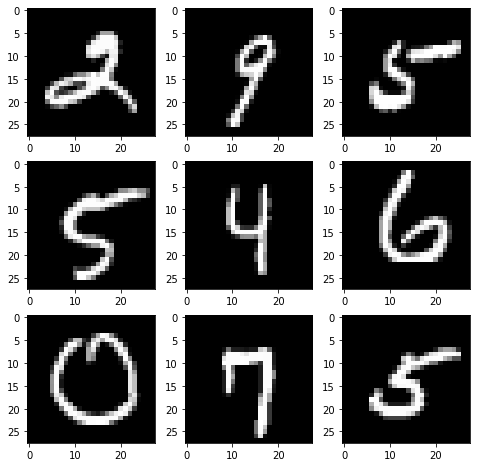

In [8]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [9]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [10]:
model = NeuralNet(input_size, hidden_size, num_classes)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss    = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1}|{num_epochs}, step: {i+1}|{n_total_steps}, '
                  f'loss: {loss.item():.4f}')

epoch: 0|2, step: 100|600, loss: 0.3805
epoch: 0|2, step: 200|600, loss: 0.3037
epoch: 0|2, step: 300|600, loss: 0.4728
epoch: 0|2, step: 400|600, loss: 0.2246
epoch: 0|2, step: 500|600, loss: 0.2537
epoch: 0|2, step: 600|600, loss: 0.1300
epoch: 1|2, step: 100|600, loss: 0.1604
epoch: 1|2, step: 200|600, loss: 0.2224
epoch: 1|2, step: 300|600, loss: 0.1217
epoch: 1|2, step: 400|600, loss: 0.1695
epoch: 1|2, step: 500|600, loss: 0.1721
epoch: 1|2, step: 600|600, loss: 0.1853


In [11]:
# test iteration
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in val_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # calculate predictions
        outputs = model(images)
        pred_val, pred_idx = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (pred_idx == labels).sum()
    print(f'acc: {100 * n_correct/n_samples}')

acc: 95.70999908447266
